In [58]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [139]:
def init_M (F, C):
    
    """
    Inicializa la matriz V con valores en los bordes y ceros en el interior.

    Parameters:
    F (int): Número de filas de la matriz.
    C (int): Número de columnas de la matriz.

    Returns:
    numpy.ndarray: Matriz V inicializada.
    """
    V = np.zeros((F, C))
    V[:, 0] = -v0  # Valor en el borde izquierdo DADO EN EL ENUNCIADO
    V[:, -1] = v0  # Valor en el borde derecho DADO EN EL ENUNCIADO
    return V

In [140]:
def Gauss_Seidel(V, dx, dy, tolerance=1e-4, max_iterations=10000):
    """
    Aplica el método de Gauss-Seidel para resolver la ecuación de Laplace.

    Parameters:
    V (numpy.ndarray): Matriz con los valores iniciales del potencial.
    dx (float): Tamaño del paso en la dirección x.
    dy (float): Tamaño del paso en la dirección y.
    tolerance (float, optional): Tolerancia para el criterio de convergencia. Default es 1e-4.
    max_iterations (int, optional): Número máximo de iteraciones. Default es 10000.

    Returns:
    numpy.ndarray: Matriz con la solución del potencial.
    """
    iterations = 0
    while iterations < max_iterations:
        max_residual = 0.0
        for i in range(1, V.shape[0] - 1):
            for j in range(1, V.shape[1] - 1):
                # Calcula el nuevo valor del potencial usando el método de Gauss-Seidel
                new_V = 0.25 * (V[i + 1, j] + V[i - 1, j] + V[i, j + 1] + V[i, j - 1])
                residual = np.abs(new_V - V[i, j])
                if residual > max_residual:
                    max_residual = residual
                V[i, j] = new_V
        iterations += 1
        if max_residual < tolerance:
            break
    return V

In [141]:
def Plot_3d(V, dx, dy):
    """
    Grafica el potencial eléctrico en 3D.

    Parámetros:
    - V (numpy.ndarray): Matriz que representa el potencial eléctrico.
    - dx (float): Tamaño del paso en la dirección x.
    - dy (float): Tamaño del paso en la dirección y.
    """
    x = np.linspace(0, V.shape[1] * dx, V.shape[1])
    y = np.linspace(0, V.shape[0] * dy, V.shape[0])
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, V.T, cmap='viridis')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Potencial eléctrico')
    ax.set_title('Solución Numérica del Potencial Eléctrico')
    plt.show()

In [143]:
def Ana_Sol(x, y, v0, a, b, n_max=1):
    
    """
    Calcula la solución analítica de la ecuación de Laplace en el punto (x, y).

    Parámetros:
    - x (float): Coordenada x del punto.
    - y (float): Coordenada y del punto.
    - v0 (float): Valor dado en el enunciado para los bordes izquierdo y derecho.
    - a (float): Longitud del lado del rectángulo en la dirección x.
    - b (float): Longitud del lado del rectángulo en la dirección y.
    - n_max (int, optional): Número máximo de términos en la serie. Default es 1.

    Returns:
    float: Valor del potencial eléctrico en el punto (x, y).
    """
  
    V = 0
    V1 = 0
    for n in range(1, n_max + 1):
        A_n=(4*v0/(np.pi*n)**2)*(1-(-1)**n)
        V += A_n*np.sin(n*np.pi*x/a)*((np.sinh(n*np.pi*y/a)*(1-np.cosh(n*np.pi*b/a))/np.sinh(n*np.pi*b/a))-np.cosh(n*np.pi*y/a))
    V1 = np.flip(V,axis=0)
    return (V1-V)/17.5

In [144]:
def difference_3d(V_numerical, V_analytical, a, b):
    """
    Grafica la diferencia entre las soluciones numérica y analítica en 3D.

    Parámetros:
    - V_numerical (numpy.ndarray): Matriz que representa la solución numérica del potencial eléctrico.
    - V_analytical (numpy.ndarray): Matriz que representa la solución analítica del potencial eléctrico.
    - a (float): Longitud del lado del rectángulo en la dirección x.
    - b (float): Longitud del lado del rectángulo en la dirección y.
    """
    x = np.linspace(0, a, V_numerical.shape[0])
    y = np.linspace(0, b, V_numerical.shape[1])
    X, Y = np.meshgrid(x, y)
    diff = V_numerical - V_analytical
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Y, X, diff, color='red')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Diferencia')
    ax.set_title('Diferencia entre Soluciones Numérica y Analítica en 3D')
    plt.show()

In [145]:
# Definimos una cuadrícula de puntos para evaluar la solución analítica.
# Esto implica dividir el rectángulo en segmentos pequeños a lo largo de los ejes x e y.
x_points = np.linspace(0, a, N)
y_points = np.linspace(0, b, M)
X, Y = np.meshgrid(x_points, y_points)

# Calculamos la solución analítica en cada punto de la cuadrícula.
# Esta solución representa el potencial eléctrico en cada punto del rectángulo,
# basado en las condiciones de borde y la geometría del problema.
a = 1.0  
b = 1.0 
v0 = 1.0
V_analytical = Ana_Sol(X, Y, v0, a, b, n_max=1)
# Inicializamos la matriz de potencial V para la solución numérica.
# Esta matriz representa una aproximación inicial del potencial eléctrico,
# que se mejorará iterativamente para converger hacia la solución exacta.
V = initialize_V(N, M)

# Resolvemos la ecuación de Laplace utilizando el método de Gauss-Seidel.
# Este método actualiza iterativamente el valor del potencial en cada punto de la cuadrícula,
# utilizando los valores de los puntos vecinos, hasta que la solución converge.
V = gauss_seidel(V, dx, dy)

In [146]:
"""" Se inicializan todos los parametros constantes que ulizaremos en todo el codigo
    Las dimensiones de la caja
    Para las longitudes en los ejes x y y se utilizan valores iguales a 1
    Puntos en la malla
    Tamaño del delta 
"""
a = 1.0  
b = 1.0 
N = 50
M = 50
dx = a / N
dy = b / M
v0 = 1.0

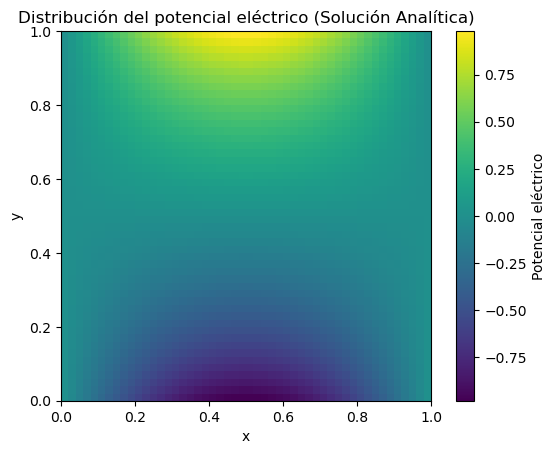

In [147]:
# Crear una nueva figura para la visualización del potencial eléctrico.
fig = plt.figure()

# Definir los puntos en el eje x e y para la cuadrícula.
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)

# Crear una cuadrícula de puntos 2D a partir de los puntos en los ejes x e y.
X, Y = np.meshgrid(x, y)

# Graficar el potencial eléctrico utilizando un mapa de colores para visualizar los valores.
# La función `contourf` crea un gráfico de contorno llenando las áreas entre las líneas de nivel con colores.
plt.imshow(V_analytical, origin="lower", cmap="viridis", extent=[0,b,0,a])

# Agregar una barra de color a la derecha del gráfico para indicar los valores correspondientes a los colores.
plt.colorbar(label='Potencial eléctrico')

# Etiquetar los ejes x e y para indicar las coordenadas espaciales.
plt.xlabel('x')
plt.ylabel('y')

# Agregar un título al gráfico para describir su contenido.
plt.title('Distribución del potencial eléctrico (Solución Analítica)')

# Mostrar el gráfico.
plt.show()

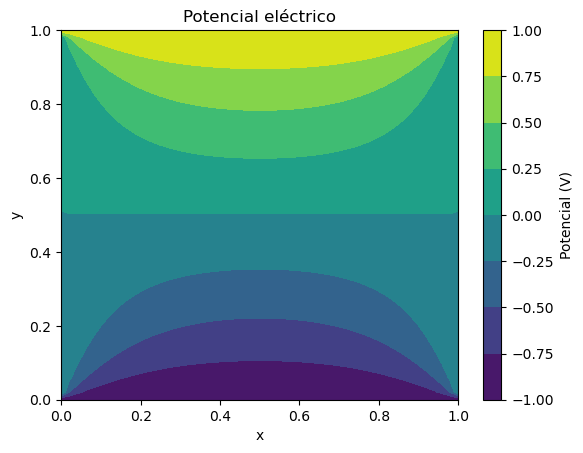

In [134]:
# Graficar el potencial V
fig = plt.figure()
x = np.linspace(0, a, N)
y = np.linspace(0, b, M)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, V.T, cmap='viridis')
plt.colorbar(label='Potencial (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Potencial eléctrico')
plt.show()

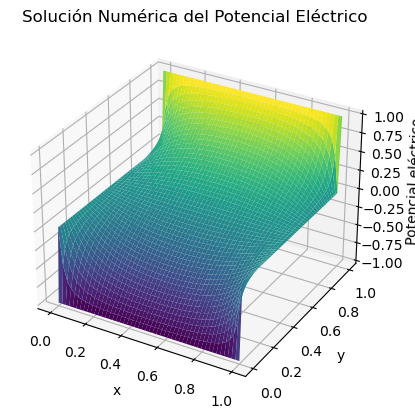

In [148]:
# Graficar el potencial V numérico en 3D
plot_potential_3d(V, dx, dy)

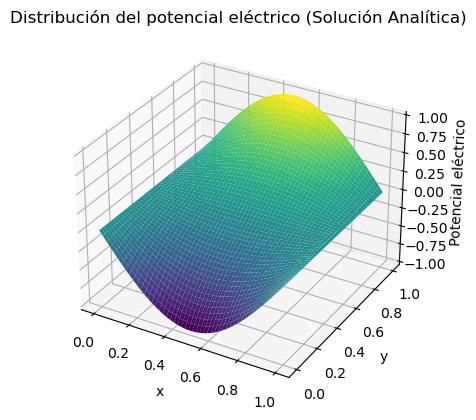

In [149]:
# Crear una nueva figura para la visualización del potencial eléctrico en 3D.
fig = plt.figure()

# Agregar un subplot en 3D a la figura.
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie del potencial eléctrico analítico en el espacio tridimensional.
ax.plot_surface(X, Y, V_analytical, cmap='viridis')

# Agregar etiquetas a los ejes x, y, y z para indicar las coordenadas espaciales y el valor del potencial.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potencial eléctrico')

# Establecer el rango de valores del eje z para mejorar la visualización.
ax.set_zlim(-1, 1)

# Agregar un título a la gráfica para describir su contenido.
ax.set_title('Distribución del potencial eléctrico (Solución Analítica)')

# Mostrar la gráfica en 3D.
plt.show()

<Figure size 640x480 with 0 Axes>

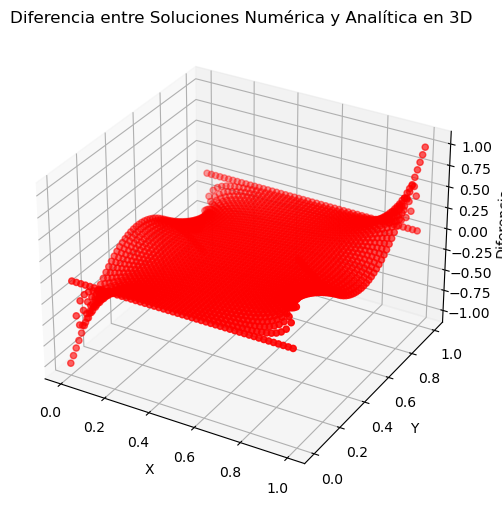

In [150]:
# Crear una nueva figura para la visualización de la diferencia entre las soluciones numérica y analítica en 3D.
fig = plt.figure()

# Llamar a la función plot_difference_scatter_3d para graficar la diferencia entre las soluciones numérica y analítica.
plot_difference_scatter_3d(V.T, V_analytical, a, b)

# Mostrar la gráfica en 3D.
plt.show()